#                                   DATAPROJECT

In [1]:
#Some questions

#1.who were the people (which category,age,class)
#2.which aged  people survivied the most ?
#3.what were the reasons||factors  that lead the people behind their survival 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
titanic_data=pd.read_csv('train.csv')#make sure your note book and csv file is in same folder 

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Question:What is the age and class of people who were survived most

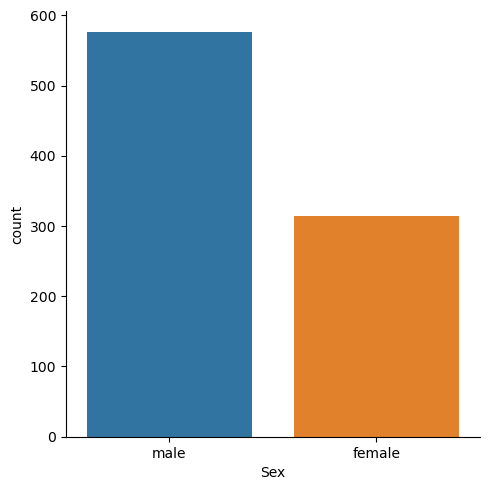

In [6]:
%matplotlib inline

sns.catplot(
    data=titanic_data,
    x='Sex',
    kind='count'
)

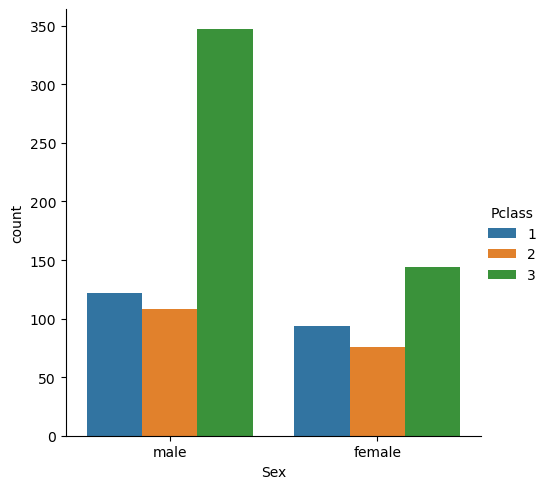

In [7]:
sns.catplot(data=titanic_data,x='Sex',kind='count',hue='Pclass')

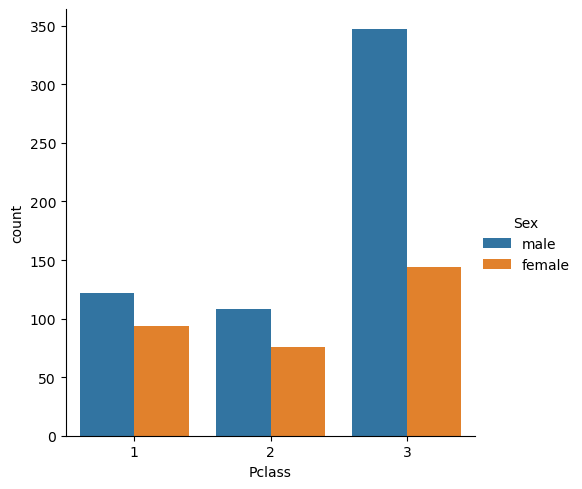

In [8]:
sns.catplot(data=titanic_data,x='Pclass',kind='count',hue='Sex')

In [9]:
def child(passenger):
    age,sex=passenger
    if age<15:
        return 'child'
    else:
        return sex

In [10]:
titanic_data['person']=titanic_data[['Age','Sex']].apply(child,axis=1)

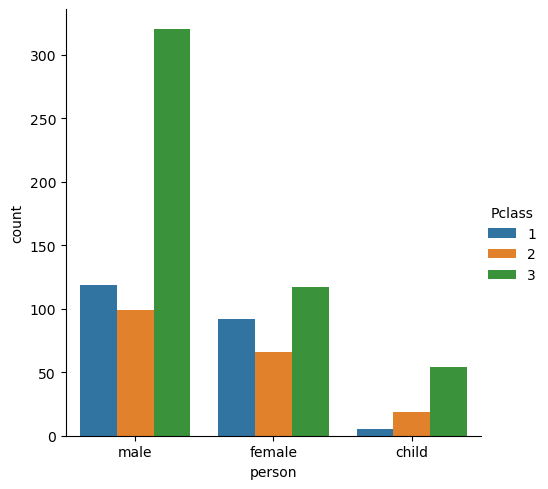

In [11]:
sns.catplot(data=titanic_data,x='person',kind='count',hue='Pclass')

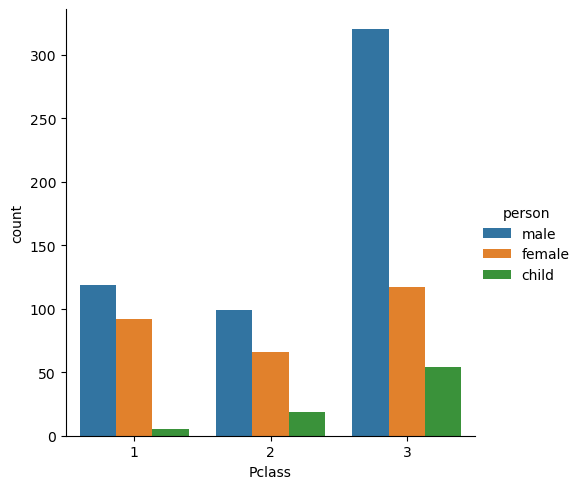

In [12]:
sns.catplot(data=titanic_data,x='Pclass',kind='count',hue='person')

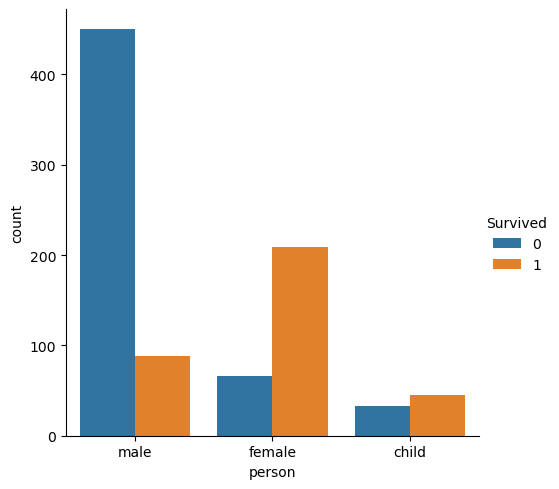

In [13]:
sns.catplot(data=titanic_data,x='person',kind='count',hue='Survived')

<Axes: >

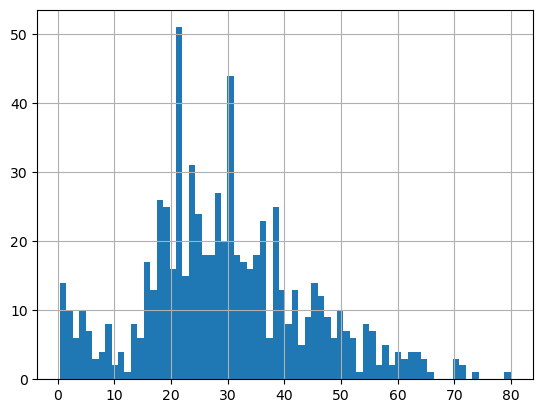

In [14]:
titanic_data['Age'].hist(bins=70)

In [15]:
titanic_data['Age'].mean()

29.69911764705882

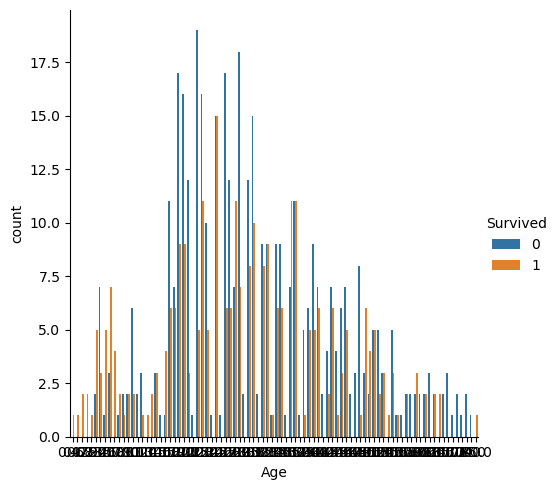

In [16]:
sns.catplot(data=titanic_data,x='Age',kind='count',hue='Survived')

In [17]:
def cat(passenger):
    age=passenger
    if age<15:
        return 'Child'
    elif age>15 and age<30:
        return 'Youth'
    elif age>30 and age<50:
        return 'Adult'
    else:
        return 'Oldage'

In [18]:
titanic_data['category']=titanic_data['Age'].apply(cat)

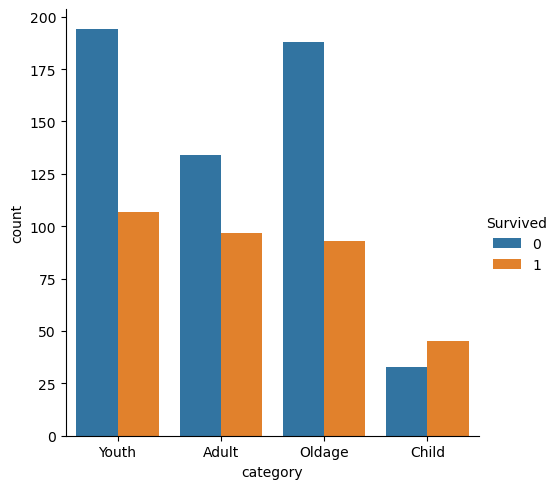

In [19]:
sns.catplot(data=titanic_data,x='category',kind='count',hue='Survived')

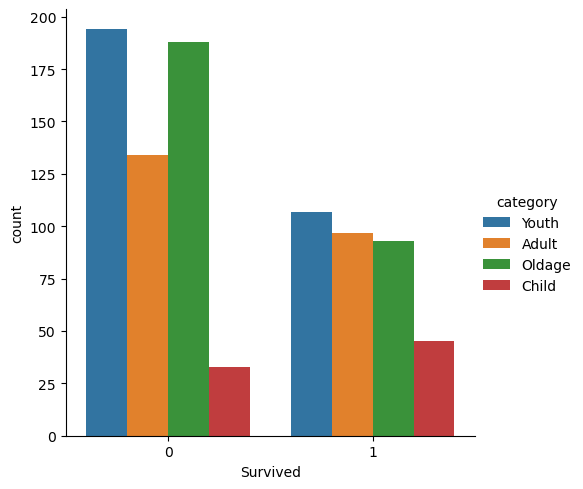

In [20]:
sns.catplot(data=titanic_data,x='Survived',kind='count',hue='category')

In [21]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

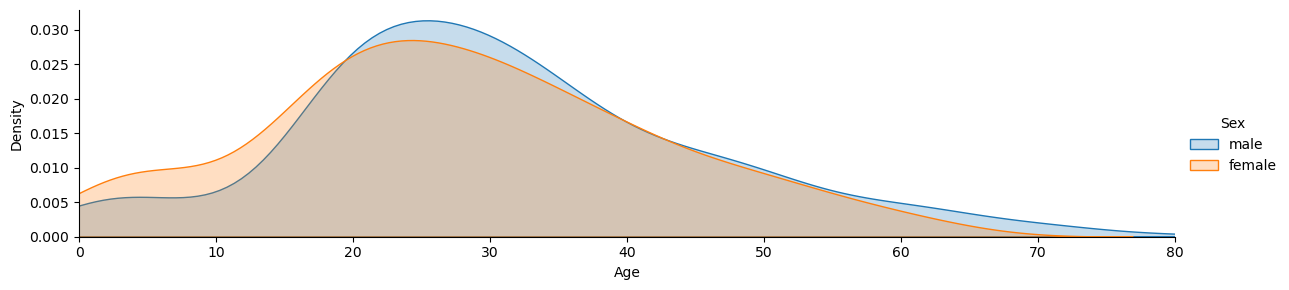

In [22]:
fig=sns.FacetGrid(data=titanic_data,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',fill=True)

old=titanic_data['Age'].max()

fig.set(xlim=(0,old))
fig.add_legend()

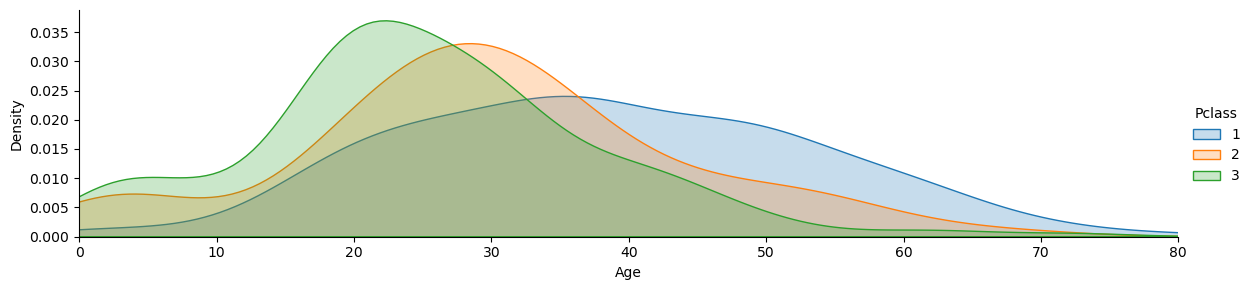

In [23]:
fig=sns.FacetGrid(data=titanic_data,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',fill=True)

old=titanic_data['Age'].max()

fig.set(xlim=(0,old))
fig.add_legend()

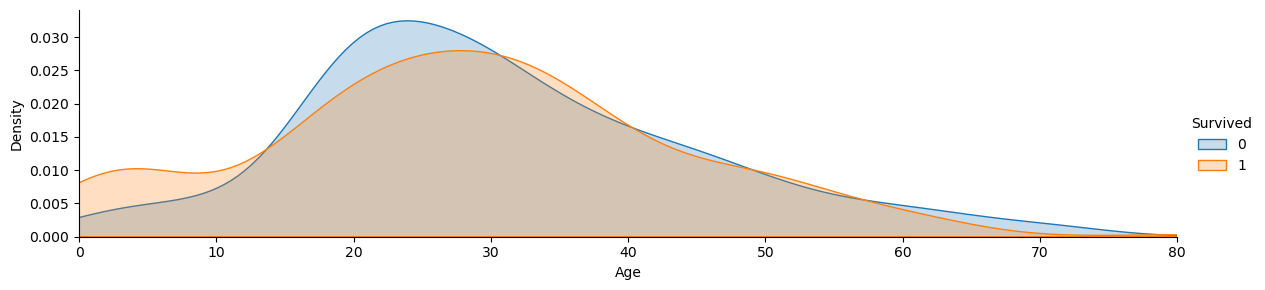

In [24]:
fig=sns.FacetGrid(data=titanic_data,hue='Survived',aspect=4)

fig.map(sns.kdeplot,'Age',fill=True)

old=titanic_data['Age'].max()

fig.set(xlim=(0,old))
fig.add_legend()

In [25]:
deck=titanic_data['Cabin'].dropna()

In [26]:
deck.head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

In [27]:
label=[]
for lab in deck:
    label.append(lab[0])
cabin_df=pd.DataFrame(label,index=deck.index,columns=['Cabin'])    

In [28]:
cabin_df.head(10)

,Cabin
1,C
3,C
6,E
10,G
11,C
21,D
23,A
27,C
31,B
52,D


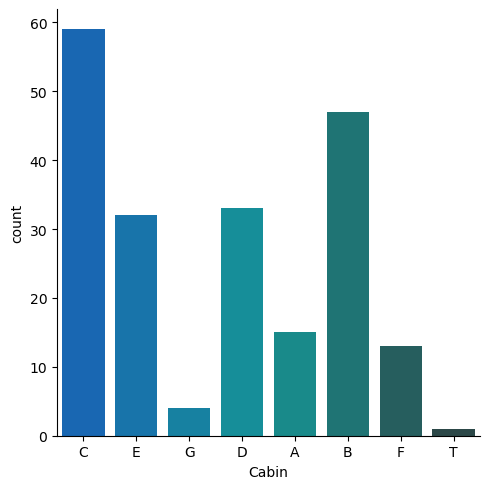

In [29]:
sns.catplot(data=cabin_df,x='Cabin',palette='winter_d',kind='count')

In [30]:
cabin_df[cabin_df.Cabin!='T'].inplace=True

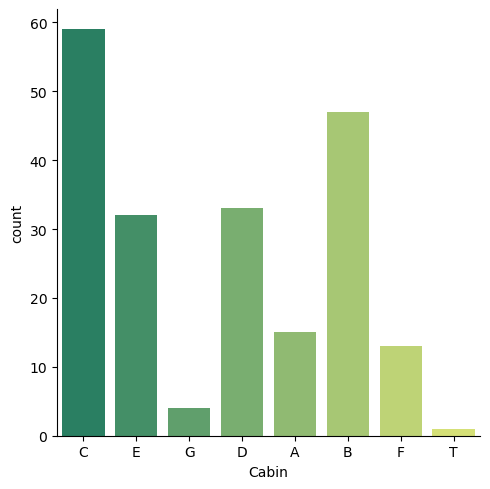

In [31]:
sns.catplot(data=cabin_df,x='Cabin',palette='summer',kind='count')

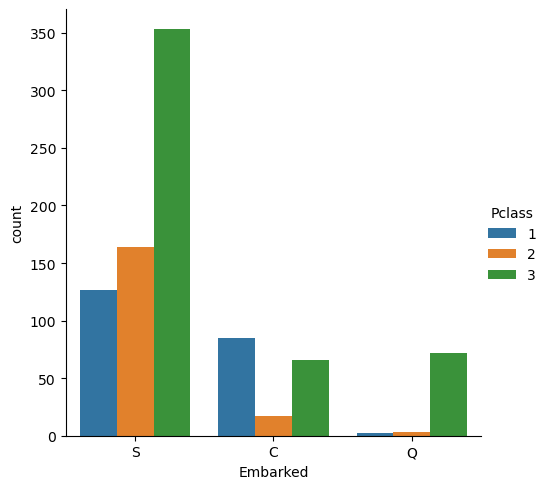

In [32]:
sns.catplot(data=titanic_data,x='Embarked',kind='count',hue='Pclass',row_order=['C','S','Q'])

In [33]:
# who Was Alone and who was alone and who was with family

In [34]:
titanic_data['Alone']=titanic_data['SibSp']+titanic_data['Parch']

In [35]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,category,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Youth,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Youth,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Adult,0


In [36]:
titanic_data['Alone'].loc[titanic_data['Alone']>0]='WithFamily'
titanic_data['Alone'].loc[titanic_data['Alone']==0]='alone'

C:\Users\Umesh Potha\AppData\Local\Temp\ipykernel_8068\2479800952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data['Alone'].loc[titanic_data['Alone']>0]='WithFamily'


In [37]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,category,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Youth,WithFamily
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Adult,WithFamily
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Youth,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Adult,WithFamily
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Adult,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Youth,alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Youth,alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,Oldage,WithFamily
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Youth,alone


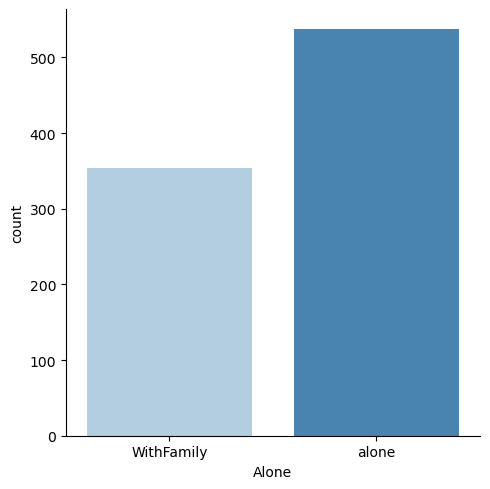

In [39]:
sns.catplot(data=titanic_data,x='Alone',kind='count',palette='Blues')

In [40]:
titanic_data['Survivor']=titanic_data.Survived.map({0:'no',1:'yes'})

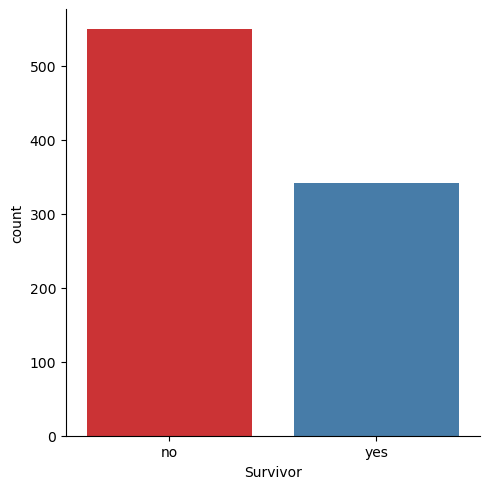

In [41]:
sns.catplot(x='Survivor',data=titanic_data,palette='Set1',kind='count',)

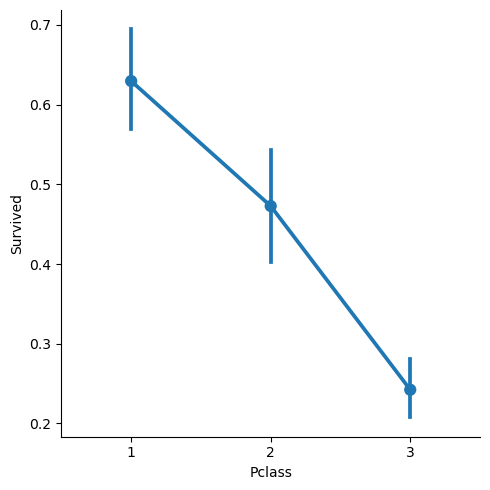

In [49]:
sns.catplot(x='Pclass',y='Survived',data=titanic_data,kind='point')

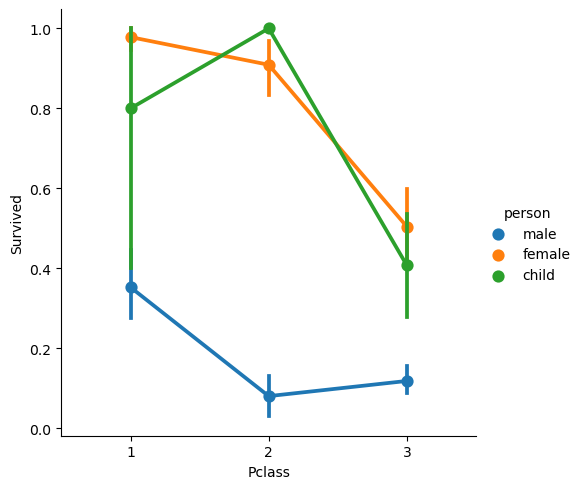

In [50]:
sns.catplot(x='Pclass',y='Survived',data=titanic_data,kind='point',hue='person')

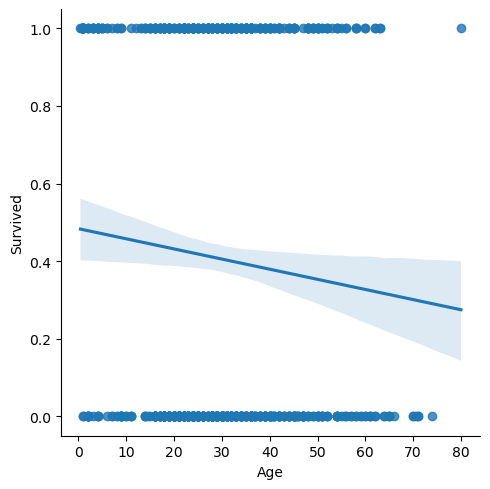

In [51]:
sns.lmplot(x='Age',y='Survived',data=titanic_data)

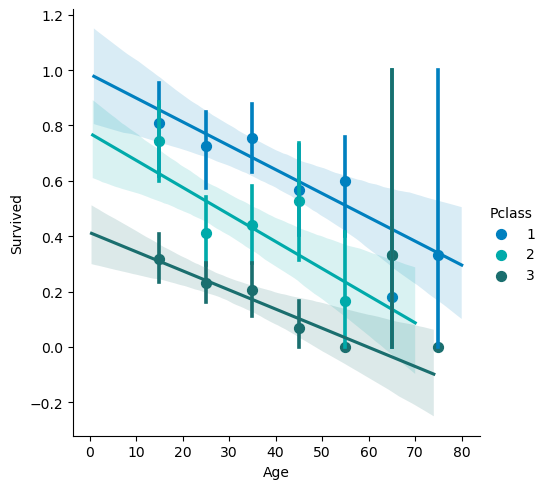

In [57]:
sns.lmplot(x='Age',y='Survived',data=titanic_data,hue='Pclass',palette='winter_d',x_bins=[15,25,35,45,55,65,75,85,95])